<a href="https://colab.research.google.com/github/maxjtwelftree/mjt/blob/master/Delta_BCM_Catostrophic_Interference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.special import beta
from random import choice

np.set_printoptions(suppress=True, precision=2, linewidth=120)


In [ ]:
# define a set of inputs and teaching patterns that requires a negative weight to complete

def negWeights():
  # Define input patterns
  inputs = np.array([
      [0, 1],
      [1, 1],
      [1, 0]
  ])

  # Define corresponding outputs
  teach = np.array([
      [0, 1],
      [1, 0],
      [1, 0]
  ])

  return inputs, teach


In [ ]:
def ABAC(NumAB = 4, NumAC = 20):
  sequence = ["A", "B"] * NumAB + ["A", "C"] * NumAC
  vocab = ["A", "B", "C"]
  V = len(vocab)
  I = dict(zip(vocab, range(V)))
  O = dict(zip(range(V), vocab))

  pairs = list(zip(sequence[:-1], sequence[1:]))
  inputs =  np.zeros((len(pairs), V))
  teach = np.zeros((len(pairs), V))
  for i, (x, y) in enumerate(pairs):
      inputs[i, I[x]] = 1
      teach[i, I[y]] = 1

  return (inputs, teach)

In [ ]:
from scipy.special import gamma

def beta_function(d, j):
    alpha = d * j + 1
    beta_param = (1 - d) * j + 1
    return (gamma(alpha) * gamma(beta_param)) / gamma(j)


In [ ]:
# learning function


def learn(inputs, teach, learning_rate = 0.1, iterations = 1, d = 0.3, k = 10., m = 10., rule = "Delta"):
    #beta_value = beta_function(d, k)
    alpha = d * k + 1
    beta_param = (1 - d) * k + 1
    B = beta(alpha, beta_param)
    print (B)
    exit()

    V = inputs.shape[1]
    weights = np.zeros((inputs.shape[1],teach.shape[1]))
    corrects = []
    ys = np.zeros(teach.shape)
    for _ in range(iterations):
        for i, (x, t) in enumerate(zip(inputs, teach)):
            # Compute the output
            y = np.dot(x, weights)

            #apply reLU
            y = np.maximum(y, 0)

            ys[i,:] = y

            # Compute the error
            if rule == "BCM":
                error = y * (y - d) * (1-y) + t
            elif rule == "DeltaBCM":
                error = t - y + m* y * (y - d) * (1-y)
            elif rule == "DeltaBeta":
                #print (t)
                #print (y)
                #print (d)
                #print (k)
                #print (B)
                error = t*(t - y) + (1-t)*(k * y**(d * k - 1) * (1 - y)**((1 - d) * k - 1) * (y-d)) / B
                #exit()
            elif rule == "Delta":
                error = t - y
            else:
                print ("unknown learning rule")
                exit()

            print (y, error)

            # Update the weights
            weights += learning_rate * np.outer(x, error)
            corrects.append((t * y).sum())
    return weights, corrects, ys


# ABAC Example

0.00909090909090909
[0. 0. 0.] [0. 1. 0.]
[0. 0. 0.] [1. 0. 0.]
[0.  0.1 0. ] [0.  0.9 0. ]
[0.1 0.  0. ] [0.9 0.  0. ]
[0.   0.19 0.  ] [0.   0.95 0.  ]
[0.19 0.   0.  ] [0.95 0.   0.  ]
[0.   0.28 0.  ] [0.   1.09 0.  ]
[0.28 0.   0.  ] [1.09 0.   0.  ]
[0.   0.39 0.  ] [0.   0.31 1.  ]
[0. 0. 0.] [1. 0. 0.]
[0.   0.42 0.1 ] [0.   0.37 0.9 ]
[0.1 0.  0. ] [0.9 0.  0. ]
[0.   0.46 0.19] [0.   0.44 0.95]
[0.19 0.   0.  ] [0.95 0.   0.  ]
[0.   0.51 0.28] [0.   0.51 1.09]
[0.28 0.   0.  ] [1.09 0.   0.  ]
[0.   0.56 0.39] [0.   0.57 1.31]
[0.39 0.   0.  ] [1.31 0.   0.  ]
[0.   0.61 0.52] [0.   0.6  1.53]
[0.52 0.   0.  ] [1.53 0.   0.  ]
[0.   0.67 0.68] [0.   0.59 1.58]
[0.68 0.   0.  ] [1.58 0.   0.  ]
[0.   0.73 0.84] [0.   0.51 1.17]
[0.84 0.   0.  ] [1.17 0.   0.  ]
[0.   0.78 0.95] [0.   0.38 0.42]
[0.95 0.   0.  ] [0.42 0.   0.  ]
[0.   0.82 1.  ] [0.   0.24 0.04]
[1. 0. 0.] [0.04 0.   0.  ]
[0.   0.84 1.  ] [0.   0.13 0.  ]
[1. 0. 0.] [0. 0. 0.]
[0.   0.86 1.  ] [0.   0.07 0.  

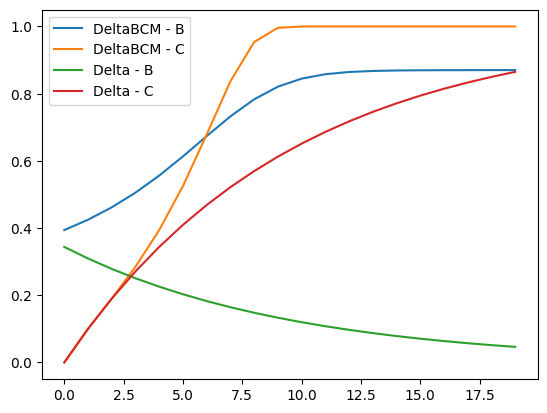

In [ ]:
# Run ABAC example - DeltaBCM vs Delta

NumAB = 4
NumAC = 20
inputs, teach = ABAC(NumAB, NumAC)
updated_weights, errorsDeltaBCM, DeltaBCM_ys = learn(inputs, teach, learning_rate = 0.1, d = 0.1, k = 10., m = 10., rule = "DeltaBCM")
updated_weights, errorsDelta, Delta_ys = learn(inputs, teach, learning_rate = 0.1, d = 0.1, k = 10., rule = "Delta")

# plot BCM errors and delta errors
import matplotlib.pyplot as plt
plt.plot(DeltaBCM_ys[NumAB*2::2,1])
plt.plot(DeltaBCM_ys[NumAB*2::2,2])
plt.plot(Delta_ys[NumAB*2::2,1])
plt.plot(Delta_ys[NumAB*2::2,2])
# add legend
plt.legend(['DeltaBCM - B', 'DeltaBCM - C','Delta - B', 'Delta - C'])
# show plot
plt.show()

0.001168461928272266
[0. 0. 0.] [0. 1. 0.]
[0. 0. 0.] [1. 0. 0.]
[0.  0.2 0. ] [0.  0.8 0. ]
[0.2 0.  0. ] [0.8 0.  0. ]
[0.   0.36 0.  ] [0.   0.64 0.  ]
[0.36 0.   0.  ] [0.64 0.   0.  ]
[0.   0.49 0.  ] [0.   0.51 0.  ]
[0.49 0.   0.  ] [0.51 0.   0.  ]
[0.   0.59 0.  ] [0.   0.41 0.  ]
[0.59 0.   0.  ] [0.41 0.   0.  ]
[0.   0.67 0.  ] [0.   0.33 0.  ]
[0.67 0.   0.  ] [0.33 0.   0.  ]
[0.   0.74 0.  ] [0.   0.26 0.  ]
[0.74 0.   0.  ] [0.26 0.   0.  ]
[0.   0.79 0.  ] [0.   0.21 0.  ]
[0.79 0.   0.  ] [0.21 0.   0.  ]
[0.   0.83 0.  ] [0.   0.17 0.  ]
[0.83 0.   0.  ] [0.17 0.   0.  ]
[0.   0.87 0.  ] [0.   0.13 0.  ]
[0.87 0.   0.  ] [0.13 0.   0.  ]
[0.   0.89 0.  ] [0.   0.11 0.  ]
[0.89 0.   0.  ] [0.11 0.   0.  ]
[0.   0.91 0.  ] [0.   0.09 0.  ]
[0.91 0.   0.  ] [0.09 0.   0.  ]
[0.   0.93 0.  ] [0.   0.07 0.  ]
[0.93 0.   0.  ] [0.07 0.   0.  ]
[0.   0.95 0.  ] [0.   0.05 0.  ]
[0.95 0.   0.  ] [0.05 0.   0.  ]
[0.   0.96 0.  ] [0.   0.04 0.  ]
[0.96 0.   0.  ] [0.04 0.   0

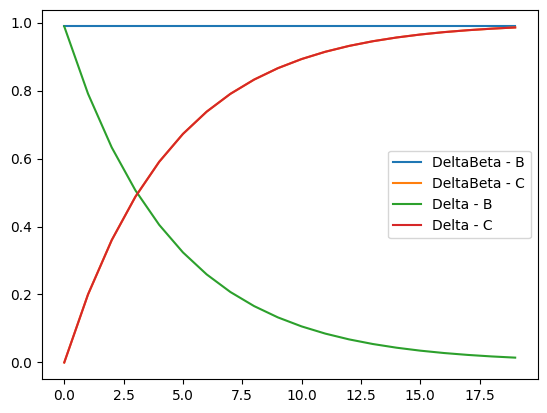

In [ ]:
# Run ABAC example - DeltaBCM vs Delta

NumAB = 20
NumAC = 20
inputs, teach = ABAC(NumAB, NumAC)
updated_weights, errorsDeltaBeta, DeltaBeta_ys = learn(inputs, teach, learning_rate = 0.2, d = 0.25, k = 10., m = 4., rule = "DeltaBeta")
updated_weights, errorsDelta, Delta_ys = learn(inputs, teach, learning_rate = 0.2, d = 0.25, rule = "Delta")

# plot BCM errors and delta errors
import matplotlib.pyplot as plt
plt.plot(DeltaBeta_ys[NumAB*2::2,1])
plt.plot(DeltaBeta_ys[NumAB*2::2,2])
plt.plot(Delta_ys[NumAB*2::2,1])
plt.plot(Delta_ys[NumAB*2::2,2])
# add legend
plt.legend(['DeltaBeta - B', 'DeltaBeta - C','Delta - B', 'Delta - C'])
# show plot
plt.show()

#AsBsCs Example

In [ ]:
def AsBsCs(Reps = 2, Size = 3):
  As = [f"A{i}" for i in range(Size)]
  Bs = [f"B{i}" for i in range(Size)]
  Cs = [f"C{i}" for i in range(Size)]
  sequence = []
  for i in range(Reps):
    sequence.append(choice(As))
    sequence.append(choice(Bs))
    sequence.append(choice(Cs))
  print (sequence)
  vocab = As + Bs + Cs
  V = len(vocab)
  I = dict(zip(vocab, range(V)))
  O = dict(zip(range(V), vocab))

  triples = list(zip(sequence[:-2], sequence[1:-1], sequence[2:]))
  inputs =  np.zeros((len(triples), V*2))
  teach = np.zeros((len(triples), V))
  for i, (x, y, z) in enumerate(triples):
      inputs[i, I[x]] = 1
      inputs[i, I[y]+V] = 1
      teach[i, I[z]] = 1

  return (inputs, teach)

inputs, teach = AsBsCs()
print (inputs)
print(teach)

['A1', 'B2', 'C1', 'A2', 'B1', 'C1']
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [ ]:
Reps = 100
Size = 10
inputs, teach = AsBsCs(Reps, Size)
print (inputs.shape)
#updated_weights, correctsDeltaBCM, DeltaBCM_ys = learn(inputs, teach, learning_rate = 0.5, d = 0.00, j = 10., m = 10., rule = "DeltaBCM")
#print ("DeltaBCM weights")
#print (updated_weights)
#updated_weights, correctsDelta, Delta_ys = learn(inputs, teach, learning_rate = 0.5, d = 0.05, j = 10., rule = "Delta")
#print ("Delta weights")
#print (updated_weights)

updated_weights, correctsDeltaBeta, DeltaBeta_ys = learn(inputs, teach, learning_rate = 0.5, d = 0.2, k = 10., m = 10., rule = "DeltaBeta")
print ("DeltaBeta weights")
print (updated_weights)

correctsDeltaBCM = []
correctsDeltaBeta = []
correctsDelta = []
for i in range(teach.shape[0]):
    if i % 3 == 0: # Cs
      #correctsDeltaBCM.append( DeltaBCM_ys[i,Size*2:].sum())
      correctsDeltaBeta.append( DeltaBeta_ys[i,Size*2:].sum())
      #correctsDelta.append(Delta_ys[i,Size*2:].sum())
    elif i % 3 == 1: # As
      #correctsDeltaBCM.append( DeltaBCM_ys[i,0:Size].sum())
      correctsDeltaBeta.append( DeltaBeta_ys[i,0:Size].sum())
      #correctsDelta.append(Delta_ys[i,0:Size].sum())
    else: # Bs
      #correctsDeltaBCM.append( DeltaBCM_ys[i,Size:Size*2].sum())
      correctsDeltaBeta.append( DeltaBeta_ys[i,Size:Size*2].sum())
      #correctsDelta.append(Delta_ys[i,Size:Size*2].sum())

# plot BCM errors and delta errors
import matplotlib.pyplot as plt
plt.plot([x/Size for x in correctsDeltaBeta])
#plt.plot(correctsDeltaBeta)
# add legend
plt.legend(['DeltaBeta'])
# show plot
plt.show()

NameError: name 'AsBsCs' is not defined